In [3]:
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.preprocessing.image import img_to_array

In [20]:
train_data=tf.keras.preprocessing.image_dataset_from_directory('/content/Digits/train',image_size=(100,100),color_mode="rgb",
    shuffle=True)
valid_data=tf.keras.preprocessing.image_dataset_from_directory('/content/Digits/test',image_size=(100,100),color_mode="rgb",
    shuffle=True)

Found 95866 files belonging to 16 classes.
Found 15198 files belonging to 16 classes.


In [7]:
name=train_data.class_names

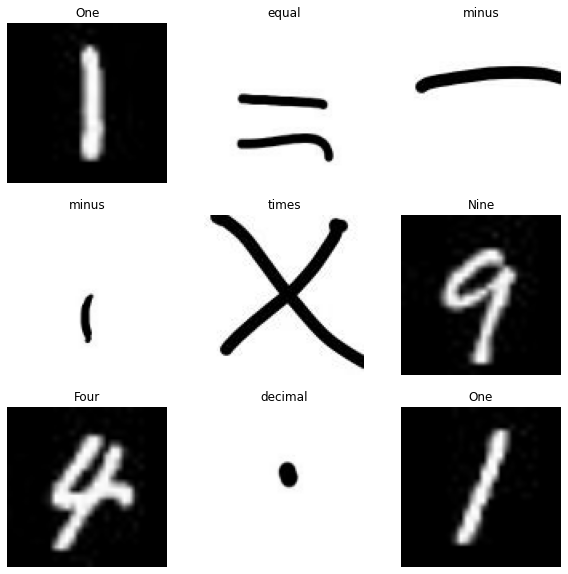

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")

In [22]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [16]:
AUTOTUNE = tf.data.AUTOTUNE
train_data= train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(100,100, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data,batch_size=60,epochs=5,validation_data=valid_data)

Epoch 1/5
2996/2996 [==============================] - 118s 39ms/step - loss: 0.7090 - accuracy: 0.7751 - val_loss: 0.4577 - val_accuracy: 0.8510
Epoch 2/5
2996/2996 [==============================] - 119s 40ms/step - loss: 0.4292 - accuracy: 0.8567 - val_loss: 0.4265 - val_accuracy: 0.8470
Epoch 3/5
2996/2996 [==============================] - 116s 39ms/step - loss: 0.3707 - accuracy: 0.8779 - val_loss: 0.3612 - val_accuracy: 0.8855
Epoch 4/5
2996/2996 [==============================] - 116s 39ms/step - loss: 0.3302 - accuracy: 0.8917 - val_loss: 0.3912 - val_accuracy: 0.8731
Epoch 5/5
2996/2996 [==============================] - 116s 39ms/step - loss: 0.2940 - accuracy: 0.9040 - val_loss: 0.3557 - val_accuracy: 0.8828


In [35]:
from google.colab import files
files.upload()

Saving index.png to index.png


{'index.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xe1\x00\x00\x00\xe1\x08\x03\x00\x00\x00\tm"H\x00\x00\x00`PLTE\xff\xff\xff\x01\x01\x01\x90\x90\x90\x91\x91\x91\xfc\xfc\xfc\x04\x04\x04\xe2\xe2\xe2\xeb\xeb\xeb\x87\x87\x87YYY\x84\x84\x84\xb5\xb5\xb5\xa2\xa2\xa2\x95\x95\x95CCC\xb2\xb2\xb2\xc0\xc0\xc0\xbf\xbf\xbftttooo\x1c\x1c\x1c999\xe8\xe8\xe8SSS\\\\\\FFFNNN\x1f\x1f\x1f\xa5\xa5\xa5\xd9\xd9\xd9777\x9c\x9c\x9c\xfc,F\x83\x00\x00\x03tIDATx\x9c\xed\xdd\xebV\x9b@\x14@\xe1\xc1\x0c\x84\xdc\x08Qc\xd4j}\xff\xb7\xec\x0c\xa6\xdeB\xc0\xc8\x19\xcf\x81\xb5?\xd7j\xfd\x95\xce^CH(\x0c8\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Ny\x7f\xfc;\xfex\xdd\xb1$\xe1\xcf\xfc>!\xf3U\xb9\xa8\xf6\xfbC\xb9\x9ak\x0fE^\x98\xb3\xfa>{\xb7\xa8\xb5G$+\xbc\xe9\x8a\x87\xd0\x95\x7fh\xac\x9e\xa7\xb4\xa9z\xb7\x0ey\xf9\xa7\xc2,{\xd2\x1e\x96\x14\x1f,\xb3\x13\xa1v9\x91Y\x0c\x9bhy\x1a\xd8\xb8\xd2\x1e\x9b\x0c\xef\xb6\xd9\x97\xed\xb3\x99\xc3\xb0\xd5f+\xed\xc1\x89\xf0\xf333\x18\xddi\x8fN\xc4uG\xe1\xcd\x14\xde\x8a\xc5\xd

In [56]:
img = keras.preprocessing.image.load_img('/content/index.png')
img_array = keras.preprocessing.image.img_to_array(img)
img_array=tf.keras.preprocessing.image.smart_resize(img_array, (100,100), interpolation='bilinear')
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
predictions

array([[1.1673756e-08, 5.0201474e-05, 1.6148312e-12, 3.5406392e-05,
        3.2714524e-15, 3.7695583e-11, 4.4866830e-08, 1.9893065e-07,
        3.9504134e-17, 5.9781044e-14, 3.3697620e-01, 9.9999738e-01,
        3.8864434e-01, 1.7730530e-01, 1.0000000e+00, 9.9756145e-01]],
      dtype=float32)

In [58]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(name[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to plus cleaned with a 100.00 percent confidence.
